# SECTION: Regression
# Polynomial regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt

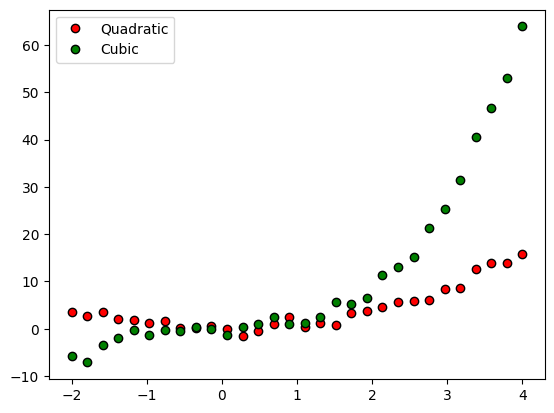

In [8]:
## generate the data

n  = 30
x  = np.linspace(-2,4,n)
y1 = x**2 + np.random.randn(n)
y2 = x**3 + np.random.randn(n)

# plot the data
plt.plot(x,y1,'ko',markerfacecolor='r')
plt.plot(x,y2,'ko',markerfacecolor='g')
plt.legend(('Quadratic','Cubic'))
plt.show()

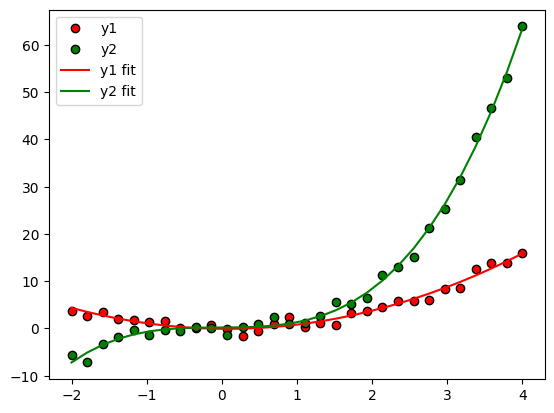

In [9]:
## now for a polynomial fit

# for y1
pterms = np.polyfit(x,y1,2)
yHat1 = np.polyval(pterms,x)

# for y2
pterms = np.polyfit(x,y2,3)
yHat2 = np.polyval(pterms,x)

# and all the plotting
plt.plot(x,y1,'ko',markerfacecolor='r',label='y1')
plt.plot(x,y2,'ko',markerfacecolor='g',label='y2')

plt.plot(x,yHat1,'r',label='y1 fit')
plt.plot(x,yHat2,'g',label='y2 fit')
plt.legend()
plt.show()

In [15]:
# compute R2

# compute R2 for several polynomial orders
orders = np.arange(1,6)

# output matrices
r2 = np.zeros((2,len(orders)))
sse = np.zeros((2,len(orders)))

# the loop!
for oi in range(len(orders)):
    
    # fit the model with oi terms
    pterms = np.polyfit(x,y1,orders[oi])
    yHat = np.polyval(pterms,x)
    
    # compute R2
    ss_eta = sum((y1-yHat)**2)  # numerator
    ss_tot = sum((y1-np.mean(y1))**2)  # denominator
    r2[0,oi] = 1 - ss_eta/ss_tot  # R^2
    sse[0,oi] = ss_eta  # store just the SSe for model comparison later
    
    
    ### repeat for y2
    pterms = np.polyfit(x,y2,orders[oi])
    yHat   = np.polyval(pterms,x)
    ss_eta = sum((y2-yHat)**2)
    ss_tot = np.var(y2)*(n-1)
    r2[1,oi] = 1 - ss_eta/ss_tot
    sse[1,oi] = ss_eta


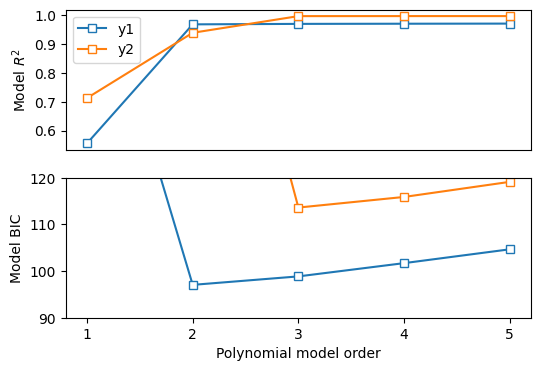

In [16]:
fig,ax = plt.subplots(2,1,figsize=(6,4))

# plot the R2 results
ax[0].plot(orders,r2[0,:],'s-',markerfacecolor='w')
ax[0].plot(orders,r2[1,:],'s-',markerfacecolor='w')
ax[0].set_ylabel('Model $R^2$')
ax[0].set_xticks([])
ax[0].legend(('y1','y2'))



# compute the Bayes Information Criterion
bic = n*np.log(sse) + orders*np.log(n)
ax[1].plot(orders,bic[0,:],'s-',markerfacecolor='w')
ax[1].plot(orders,bic[1,:],'s-',markerfacecolor='w')
ax[1].set_xlabel('Polynomial model order')
ax[1].set_xticks(range(1,6))
ax[1].set_ylabel('Model BIC')

# optional zoom
ax[1].set_ylim([90,120])

plt.show()

---
# Polynomial design matrix
---

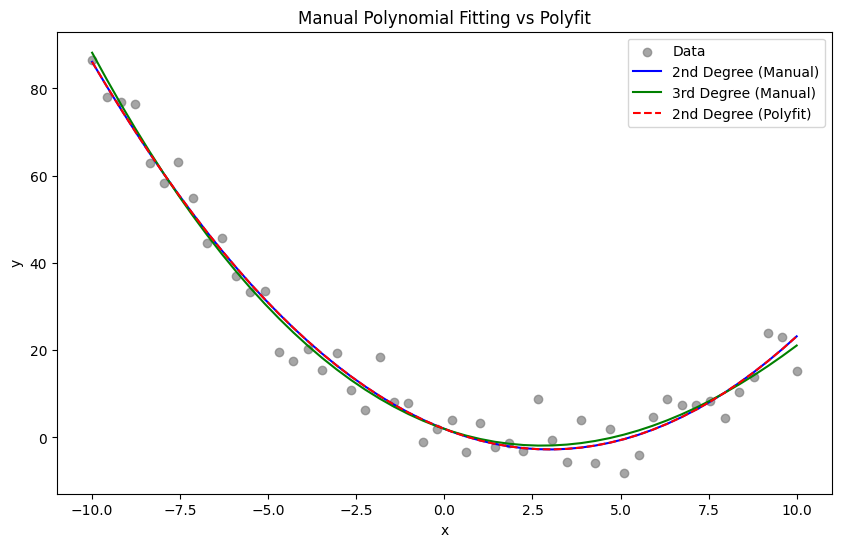

In [17]:

# Step 1: Generate sample data
np.random.seed(42)  # For reproducibility
x = np.linspace(-10, 10, 50)  # 50 evenly spaced points
y = 0.5 * x**2 - 3 * x + 4 + np.random.normal(0, 5, size=x.shape)  # Quadratic data with noise

# Step 2: Create the design matrix function
def design_matrix(x, degree):
    """Creates a design matrix for a polynomial of given degree."""
    return np.vstack([x**i for i in range(degree + 1)]).T

# Step 3: Fit the model manually
def fit_polynomial(x, y, degree):
    """Fits a polynomial of given degree to data."""
    X = design_matrix(x, degree)  # Create the design matrix
    coefficients = np.linalg.pinv(X) @ y  # Solve for coefficients using pseudo-inverse
    return coefficients

# Step 4: Predict values
def predict(x, coefficients):
    """Predicts y values given x and polynomial coefficients."""
    X = design_matrix(x, len(coefficients) - 1)
    return X @ coefficients

# Fit a 2nd-degree polynomial
coeff_2nd = fit_polynomial(x, y, degree=2)
yhat_2nd = predict(x, coeff_2nd)

# Fit a 3rd-degree polynomial
coeff_3rd = fit_polynomial(x, y, degree=3)
yhat_3rd = predict(x, coeff_3rd)

# Step 5: Compare with numpy.polyfit and polyval
coeff_polyfit = np.polyfit(x, y, 2)
yhat_polyfit = np.polyval(coeff_polyfit, x)

# Step 6: Plot results
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='gray', label='Data', alpha=0.7)
plt.plot(x, yhat_2nd, label='2nd Degree (Manual)', color='blue')
plt.plot(x, yhat_3rd, label='3rd Degree (Manual)', color='green')
plt.plot(x, yhat_polyfit, '--', label='2nd Degree (Polyfit)', color='red')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Manual Polynomial Fitting vs Polyfit')
plt.legend()
plt.show()

var2

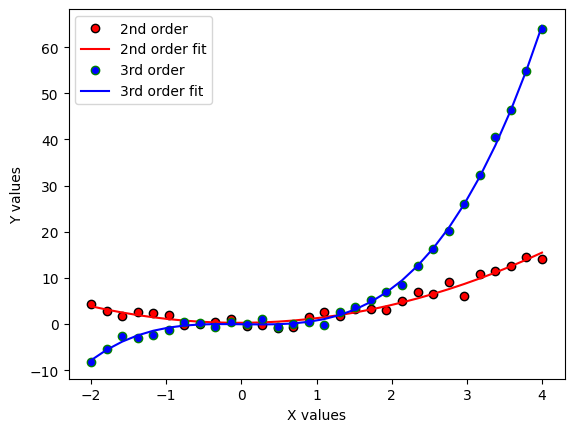

In [18]:
## generate the data
n  = 30
x  = np.linspace(-2,4,n)
y2 = x**2 + np.random.randn(n)
y3 = x**3 + np.random.randn(n)
 
 
# 2nd order design Matrix
desmat2 = np.vstack((np.ones(n), x, x**2)).T
# fitting 2nd order polynomial
pterms2 = np.linalg.lstsq(desmat2, y2,)[0][::-1]
# predict fitting values
yHat2 = pterms2[len(pterms2)-1] + pterms2[len(pterms2)-2]*x + pterms2[len(pterms2)-3]*x**2
 
# 3rd order design Matrix
desmat3 = np.vstack((np.ones(n), x, x**2, x**3)).T
# fitting 3rd order polynomial
pterms3 = np.linalg.lstsq(desmat3, y3,)[0][::-1]
# predict fitting values
yHat3 = pterms3[len(pterms3)-1] + pterms3[len(pterms3)-2]*x + pterms3[len(pterms3)-3]*x**2 + + pterms3[len(pterms3)-4]*x**3
 
 
#ploting
plt.plot(x,y2,'ko',markerfacecolor='r',label='2nd order')
plt.plot(x,yHat2,'r',label='2nd order fit')
 
plt.plot(x,y3,'go',markerfacecolor='b',label='3rd order')
plt.plot(x,yHat3,'b',label='3rd order fit')
 
plt.xlabel('X values')
plt.ylabel('Y values')
plt.legend()
plt.show()

var3

Second Order Polynomial Regression
---------------------------------
Betas solved with linear algebra: [0.13963643 0.01213655 0.95691067]
Betas solved with np.polyfit: [0.13963643 0.01213655 0.95691067]

Third Order Polynomial Regression
---------------------------------
Betas solved with linear algebra: [-0.14445812  0.1604247   0.12379072  0.96262543]
Betas solved with np.polyfit: [-0.14445812  0.1604247   0.12379072  0.96262543]


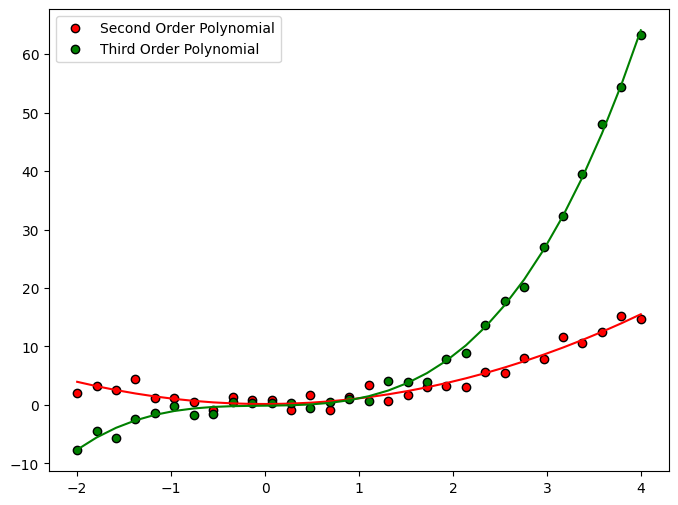

In [19]:
 
n  = 30
x  = np.linspace(-2,4,n)
 
y2 = x**2 + np.random.randn(n)
y3 = x**3 + np.random.randn(n)
 
# design matrices
X2 = np.vstack([np.ones(len(x)), x, x**2]).T
X3 = np.vstack([np.ones(len(x)), x, x**2, x**3]).T
 
# solve for Betas lin alg
XTX2 = X2.T @ X2
XTX2inv = np.linalg.inv(XTX2)
B2 = XTX2inv @ X2.T @ y2
pterms2 = np.polyfit(x, y2, 2)
 
print("Second Order Polynomial Regression\n---------------------------------")
print("Betas solved with linear algebra:", B2)
print("Betas solved with np.polyfit:", pterms2[::-1])
 
# solve for Betas lin alg
XTX3 = X3.T @ X3
XTX3inv = np.linalg.inv(XTX3)
B3 = XTX3inv @ X3.T @ y3
pterms3 = np.polyfit(x, y3, 3)
 
print("\nThird Order Polynomial Regression\n---------------------------------")
print("Betas solved with linear algebra:", B3)
print("Betas solved with np.polyfit:", pterms3[::-1])
 
# best fit lines
y2hat = X2 @ B2
y3hat = X3 @ B3
 
# plot the points
plt.figure(figsize=(8,6))
plt.plot(x,y2,'ko',markerfacecolor='r')
plt.plot(x,y3,'ko',markerfacecolor='g')
 
# plot the fitted line
plt.plot(x, y2hat, 'r-')
plt.plot(x, y3hat, 'g-')
plt.legend(["Second Order Polynomial", "Third Order Polynomial"])
plt.show()